# Image Recognition – Chihuahua or Blueberry Muffin?

For this class, we have a final project to achieve. We choose to work on the classification of Chihuahua and Blueberry Muffin. To do that, we will use the Annexe B of the **"Hands-On Machine learning with Scikit-Learn, Keras & Tensorflox"** book. In this book, we have a **checklist to conduct a machine learning project**. This list will help us to have a guideline to ensure a good project. 

But first of all, we pose the problem and its scope by answering the questions below:

## 1.	Frame the Problem and Look at the Big Picture

**1.1	Define the objective in business terms.**

The objective here is for the computer to identify a chihuahua and a blueberry muffin and be able to make the difference between these objects which are surprisingly similar. This program can effectively help you make the difference between your chihuahua and your blueberry muffin, so you never have to confuse both and eat the chihuahua or pet the blueberry muffin.

**1.2	How will your solution be used?**

This program can be very useful for image organization if you have trouble making the difference between your chihuahua and your blueberry muffin when you are searching for a photo of one of these two objects on your phone for example, and visual search if let’s say you have a website for amateurs of blueberry muffin and chihuahua and that the user wants to see the two categories separately, he can choose to only see chihuahua and not see a single blueberry muffin.

**1.3	What are the current solutions/workarounds (if any)?**

Right now, the solution that is currently available to recognize a blueberry muffin and a chihuahua is either a trained human eye that has no problem recognizing a blueberry muffin and a fine chihuahua. The other solution is a computer program using fastai library which does the same thing that we are implementing with keras and tensorflow

**1.4  How should you frame this problem (supervised/unsupervised, online/offline, etc.)?**

The aim of our experimentation is to train a machine learning image recognition that can differanciate a dog of a blueberry muffin. We do have the desired output and we want a machine which gives us the closest output to the desired one as possible. In this case, we will consider that our problem would be a supervised learning . A supervised learning is to learn a function that, given a sample of data and desired outputs, best approximates the relationship between input and output observable in the data. 

The project itself won’t be needed to be on a cloud. The amont of data is sufficient for our predictions to be done locally. We can say that in this case we would be “offline”. 

**1.5  How should performance be measured ?**

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234 

The performance of our model can be measured through the validation step. This step compares the accuracy and loss of the train and the validation. To do so, we include the validation data in our model.fit in order to train it taking into account these validations. 

We tried to perform model validation but it was not conclusive, we leave this step for code improvement. We will see at the end of the notebook the different axes of improvement for our image classification algorithm. 

# 2. Get the data

In this part, we are going to prepare our datasets. Indeed, to train a machine learning model we must need a training and test sets. The distribution of this two sets depends of the database size, i.e.:
   > **If your dataset is small : 80% train, 10% validation and 10% test**
   
   > **If your dataset is very large (usuallly the case): 98% train, 1% validation and 1% test**

### 2.1 List the data you need

We want to do a binary image classification. So, we need a database composed by images of chihuahua and blueberry muffin. 

> Train 
    
                ----- Chihuahua
                ----- Muffin
    
> Test 
    
                ----- Chihuahua
                ----- Muffin
    
We store this datasets into a folder named **"ChihuahuaVSMuffin"** next to the notebook. You will find it in the project folder. To train our model, we will need a large amount of data. To do that, we will preprocess the data and do data augmentation. 

### 2.2 Check legal obligation & authorizations access

To get our datasets, we find the images on the internet. We didn't check the user right to use the images but if the project would be a professional one, you must need to get the authorizations for each image. Indeed, our study is for an university project so we could skip this step, but it is important to geet the authorization to use images. 

### 2.3 Import the libraries

For this machine learning project, we must use the **keras, tensorflow libraries** and others but the goal of this project is to learn how to create a model and train it with this two principal libraries. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
import itertools  


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import numpy as np
import cv2
import os

### 2.4 Load the train dataset

In the project folder, you have the notebook and the dataset folder named "ChihuahuaVSMuffin" which contains the dataset images. 

**We must win this war between the two.**

To do that, we first define the path to each dataset folder. We separate the chihuahua and muffin images into two folders to define the classes.

In [ ]:
dataset = "ChihuahuaVSMuffin/"

chihuahua_images = os.path.join('ChihuahuaVSMuffin/train/Chihuahua')
muffin_images = os.path.join('ChihuahuaVSMuffin/train/Muffin')

To be sure that the dataset is correctly load, we could check the length of each files. 

Indeed, we can see that the two folders have a big length, so the loading is successful.

In [ ]:
print("Number of Chihuahua images: ", len(os.listdir(chihuahua_images)))
print("Number of Muffin Images: ", len(os.listdir(muffin_images)))

chihuahua_files = os.listdir(chihuahua_images)
muffin_files = os.listdir(muffin_images)

Number of Chihuahua images:  255
Number of Muffin Images:  272


In [ ]:
img_size = 150
labels = ['Chihuahua','Muffin']

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_data('ChihuahuaVSMuffin/train')
#print(train)

### 2.5 Display the train dataset

We can check again if the loading is good, we can display the files.

For example, the pic_index reprensents a random number to display two images from this number for the two folder (Chihuahua & Muffin).

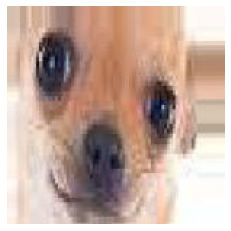

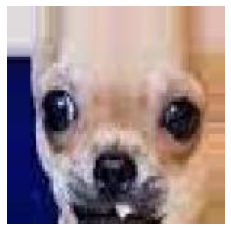

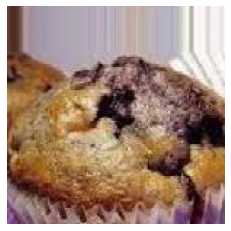

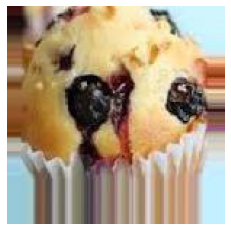

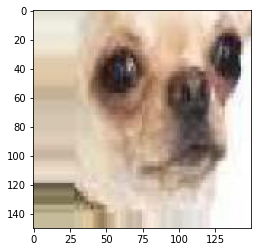

In [ ]:
%matplotlib inline

# We display only the n-2 images from each folder
pic_index = 40

next_chihuahua = [os.path.join(chihuahua_images, fname) 
                for fname in chihuahua_files[pic_index-2:pic_index]]
next_muffin = [os.path.join(muffin_images, fname) 
                for fname in muffin_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_chihuahua+next_muffin):
    #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

img1 = image.load_img('ChihuahuaVSMuffin/train/Chihuahua/chihuahua-5.jpg', target_size=(150, 150))
x1 = image.img_to_array(img1)/255.
x1 = np.expand_dims(x1, axis=0)
plt.imshow(x1[0])

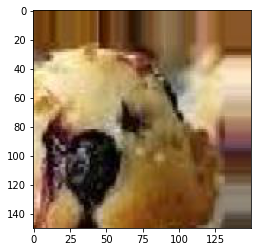

In [ ]:
img2 = image.load_img('ChihuahuaVSMuffin/train/Muffin/muffin-4.jpeg', target_size=(150, 150))
x2 = image.img_to_array(img2)/255.
x2 = np.expand_dims(x2, axis=0)
plt.imshow(x2[0])

### 2.6 Load the test dataset

In this part, we will download the training and the dataset test. The training set will allow us to train the model. The test set will allow us to validate our training and to limit overfitting, it will then allow us to verify that our model is right in a last part where we will predict the class of each image (chihuahua or muffin).

In [ ]:
chihuahua_images_test = os.path.join('ChihuahuaVSMuffin/test/Chihuahua')
muffin_images_test = os.path.join('ChihuahuaVSMuffin/test/Muffin')

print("Number of Chihuahua images: ", len(os.listdir(chihuahua_images_test)))
print("Number of Muffin Images: ", len(os.listdir(muffin_images_test)))

chihuahua_test = os.listdir(chihuahua_images_test)
muffin_test = os.listdir(muffin_images_test)

Number of Chihuahua images:  40
Number of Muffin Images:  18


In [ ]:
test = get_data('ChihuahuaVSMuffin/test')
#print(test)

Here, we can check that we have the same lenght for the two classes of the test dataset. Indeed, if we have more pictures in one classe, we can create a biais in the model (even for the training dataset).

# 3. Explore the data

### 3.1 Explore the train dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


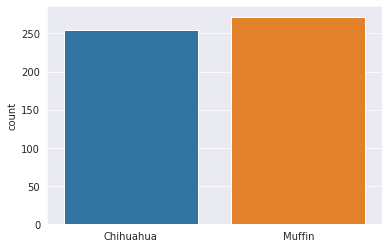

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Chihuahua")
    else :
        l.append("Muffin")
sns.set_style('darkgrid')
sns.countplot(l)

According to the chart above, w can see that we have around 250 images for each class (Chihuahua & Muffin).

> Based on the information we saw before, if we have a small dataset : we must have 
        80% train, 10% validation & 10% test
        
So, we should have a test dataset with 30 images. 

### 3.2 Explore the test dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


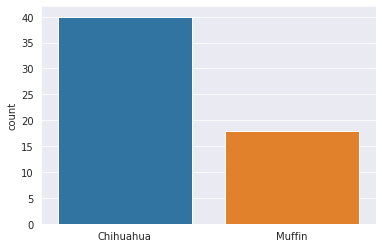

In [ ]:
l = []
for i in test:
    if(i[1] == 0):
        l.append("Chihuahua")
    else :
        l.append("Muffin")
sns.set_style('darkgrid')
sns.countplot(l)

### 3.3 Explore the size distribution 

In [ ]:
train.shape

(527, 2)

In [ ]:
test.shape

(58, 2)

# 4. Prepare the Data 

In this part, we are going to train the dataset to differenciate the two classes. 

We use "ImageDataGenerator" to set the image parameters. It facilitates data processing.

Found 17 images belonging to 2 classes.
(17, 150, 150, 3) (17,)
len list_chihuahua 255
Found 17 images belonging to 2 classes.
len list_muffin 238


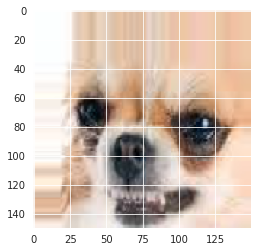

In [ ]:
IMG_SIZE = 150

Xtrain = ImageDataGenerator(
    rescale = 1./255, # rescale enables to automate the pixel going from 1 to 255 (RGB) to 0 to 1
    width_shift_range=0.2, # This shift the image to the lefft or the right (horizontally). 0.2 count percentage of total width as range
    height_shift_range=0.2, # This shift the image up or down (vertically). 0.2 count percentage of total height as range
    rotation_range=0.2, # This rotate the image of 0.2
    shear_range=0.2, # This shear the image of 0.2 
    zoom_range=0.2, # This zoom the image of 0.2.  
    horizontal_flip=True,
    fill_mode='nearest'
)

list_chihuahua=[]
y = [1]
y = np.expand_dims(y, axis = 0)
i = 49
for X_batch_Muf, y_batch_Muf in Xtrain.flow_from_directory('ChihuahuaVSMuffin/train_copy/Muffin/',batch_size = 17,
    target_size=(150,150), # target_size is defined by the number of pixel, here 150
    class_mode = 'binary'# class_mode enables to split the database in two with 'binary'
    ):
    # create a grid of 3x3 images
    plt.imshow(X_batch_Muf[0].reshape(IMG_SIZE,IMG_SIZE,3))
    x_batch_Muf = X_batch_Muf[:].reshape(17,IMG_SIZE,IMG_SIZE,3)
    #print(len(x_batch_Muf))
    for img in x_batch_Muf:
        plt.imsave('ChihuahuaVSMuffin/train/Muffin/'+'muffin-'+str(i)+'.jpeg',img) 
        list_chihuahua.append(img)
        i+=1
    # show the plot
    if i>= 300:
        break
#print(X_batch_Muf[0])
print(X_batch_Muf.shape, y_batch_Muf.shape)

print('len list_chihuahua', len(list_chihuahua))

list_muffin=[]
i = 70
for X_batch_Chi, y_batch_Chi in Xtrain.flow_from_directory('ChihuahuaVSMuffin/train_copy/Chihuahua/',batch_size = 17,
    target_size=(150,150), # target_size is defined by the number of pixel, here 150
    class_mode = 'binary'# class_mode enables to split the database in two with 'binary'
    ):
    # create a grid of 3x3 images
    plt.imshow(X_batch_Chi[0].reshape(IMG_SIZE,IMG_SIZE,3))
    x_batch_Chi = X_batch_Chi[:].reshape(17,IMG_SIZE,IMG_SIZE,3)
    #print(len(x_batch_Chi))
    for img in x_batch_Chi:
        plt.imsave('ChihuahuaVSMuffin/train/Chihuahua/'+'chihuahua-'+str(i)+'.jpg',img) 
        list_muffin.append(img)
        i+=1
    # show the plot
    if i>= 300:
        break
# All of these parameters are set at 0.2 in order to automate all of the images so they are following the same model

print('len list_muffin', len(list_muffin))

Xtest = ImageDataGenerator(rescale = 1./255)

#validation_generator = Xtest.flow_from_directory(    #enlever commentaire regarder batch_size si c'est la bonne et regarder si ca marche
      #  'ChihuahuaVSMuffin/validation/',
      #  target_size=(150, 150),
       # batch_size=12,
       # class_mode='binary')
        
#print('x_batch_Chi', x_batch_Chi)


# 5. Shortlist Promising Model

We should test the training on different models in a reasonable time. This step could help us to define wich model is the better one to do image classification. We can try different hyperparameters too to improve our model. 

> The simple models we can try are :
        - linear
        - naive Bayes
        - SVM
        - Random Forest 
        - neural netword

We are going to try to implment one of this model and we make researches and we choose the neural network because it is commonly use to do Image classification. 

If we have time, we are going to implement more models and to measure and compare their performance. We can use N-fold cross-validation and compute the mean and the standard deviation of the performance measure on the N-folds.

### 5.1 Analyze the most significant variables for each algorithm

We are going to try to do three different neural networks (with different layers) and compare them. 

For the neural networks we are going to use, the necessary variables are the images of both types (Chihuahua and Muffin) in matrix form, as it is easier to manipulate them as vectors, as well as their corresponding classes to indicate to the model during training the class of each image. 

### 5.2 Analyze the types of errors the models make

The errors that an algorithm can make as a result of its training can be the following:

- Create biases due to a lack of enrichment of the database (for example in our case, if we put only pictures of chihuahua with a white coat and no pictures of chihuahua with a very dark coat, or if we only had very baked muffins and therefore very golden and no underbaked muffins).


- Not using the correct operating functions (which reduce the efficiency of the model)

The main cause would be the lack of enrichment of the database. To avoid this, it is necessary to make sure that the images used are well varied.


### 5.3     Neural Network Model 1

Now, we need a model to do a machine learning algorithm. 

We use tf.keras.Sequential to create a model with multuple layers. 

Then, we use the 'relu' activation function because we saw in class that it is the best to do image classification.

The biggest disadvantage of the ReLU function is that the gradient of the function becomes zero for zero or negative inputs. This makes it not suitable for backpropagation when the input has negative values. But it is used for most computer vision model as the image pixels do not have negative values. The advantage of this function is that it is computationally efficient and allows the network to converge quickly.Also, ReLU is nonlinear, and it has a derivative function that makes it suitable for backpropagation for weight adjustment as the neural network learns.

Filters determines the number of kernels to convolve the input volume. Here the filter is 32 then 64 and max pooling is then used to reduce the spatial dimensions of the output volume. Layers early in the network architecture (closer to the actual input image) learn fewer convolutional layers while layers deeper in the network (closer to the output prediction) will learn more filters.
Then kernel_size, a 2-tuple specifying the width and height of the 2D convolution window and it must an odd integer as well. Here the filter_size is (3,3): the image is larger than 128x128 so we started with 5x5 and 7x7 kernel to learn larger features and then we reduced spatial dimensions with 3x3.

In [ ]:
model = tf.keras.Sequential([
    
    #1st Conv2D Layer

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)), # input_shape is the size of the matrix
    tf.keras.layers.MaxPooling2D(2,2),
    
    #2nd Conv2D Layer
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dropout (Dropout)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               4

### 5.4 Transfer Learning

For this part, we did some research about the concept of transfer learning. It is an optimization that allows rapid progress or improved performance when modeling the second task. Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned.


The steps to apply the transfer learning to your algorithm are : 

> **Take a model trained on a large dataset**


> **Transfer its knowledge to a smaller dataset**


To go deeper, we have to :

- Load in a pre-trained CNN model trained on a large dataset
- Freeze parameters (weights) in model’s lower convolutional layers
- Add custom classifier with several layers of trainable parameters to model
- Train classifier layers on training data available for task
- Fine-tune hyperparameters and unfreeze more layers as needed



We didn't have the time to explore deeper this part. It could be an improvment area for a complex project.

### 5.5 Train the model on the train dataset

When you have the model, with your layers, you can trained your model on your dataset

In [ ]:
from IPython.display import Image
Image(filename='img/Courbes_50_epochs.png')

FileNotFoundError: ignored

The above curves were obtained after training the model with 50 epochs. It can be observed that the model obtains sufficient precision from 25 epochs. So we are going to train our model with 25 epochs to avoid overtraining and overfitting.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

lst=[]
lst = list_chihuahua + list_muffin
#print(lst)
print('len lst', len(lst))

x = np.asarray(lst)
#x = np.array(x_batch_Chi,x_batch_Muf)  #array comprenant toutes les images de chiahuahua +muffin
#print(x)
y = np.array([0] * len(list_chihuahua) + [1] * len(list_muffin))             
#array de 0 pour muffin et 1 pour chihuahua ou inverse
#print(y)

history = model.fit(    # mettre à jour history et regarder si ca marche
        x, y,
        epochs=25, 
        #steps_per_epochs = None,
        shuffle = True,
        #validation_data=(x_test,y_test)
        )

len lst 493
Epoch 1/25
16/16 [==============================] - 1s 40ms/step - loss: 1.2863 - accuracy: 0.5639
Epoch 2/25
16/16 [==============================] - 1s 36ms/step - loss: 0.5325 - accuracy: 0.6836
Epoch 3/25
16/16 [==============================] - 1s 36ms/step - loss: 0.3922 - accuracy: 0.8215
Epoch 4/25
16/16 [==============================] - 1s 36ms/step - loss: 0.3066 - accuracy: 0.8803
Epoch 5/25
16/16 [==============================] - 1s 36ms/step - loss: 0.2367 - accuracy: 0.9026
Epoch 6/25
16/16 [==============================] - 1s 36ms/step - loss: 0.1986 - accuracy: 0.9108
Epoch 7/25
16/16 [==============================] - 1s 37ms/step - loss: 0.2412 - accuracy: 0.8986
Epoch 8/25
16/16 [==============================] - 1s 37ms/step - loss: 0.1438 - accuracy: 0.9554
Epoch 9/25
16/16 [==============================] - 1s 36ms/step - loss: 0.1459 - accuracy: 0.9513
Epoch 10/25
16/16 [==============================] - 1s 36ms/step - loss: 0.1819 - accuracy: 0.92

### 5.6.1 Evaluate the model

To evaluate the model, we are going to use the history and the accuracy. There are initial parametels when you compute a mode.

First, we display the muffin dataset in another way (just to try). 

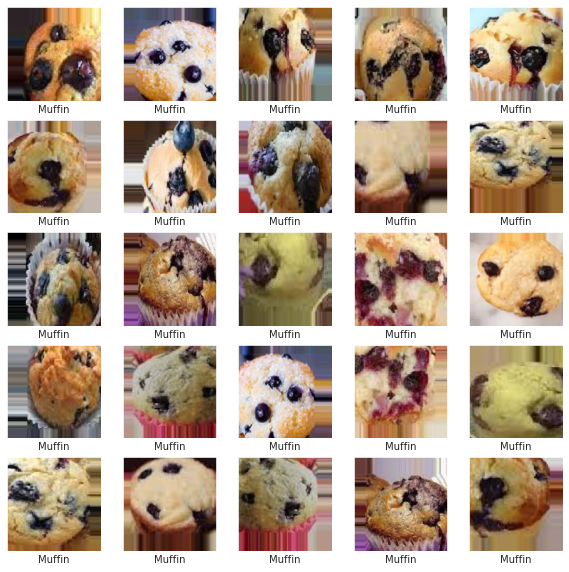

In [ ]:
class_names = ['Muffin']

def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

display_images(x, y)
plt.show()

With the history function, we can display the history of the loss and the accuracy, but we are going to plot it to see it better.

In [ ]:
#history.history

We display the training accuracy and loss of the model. 

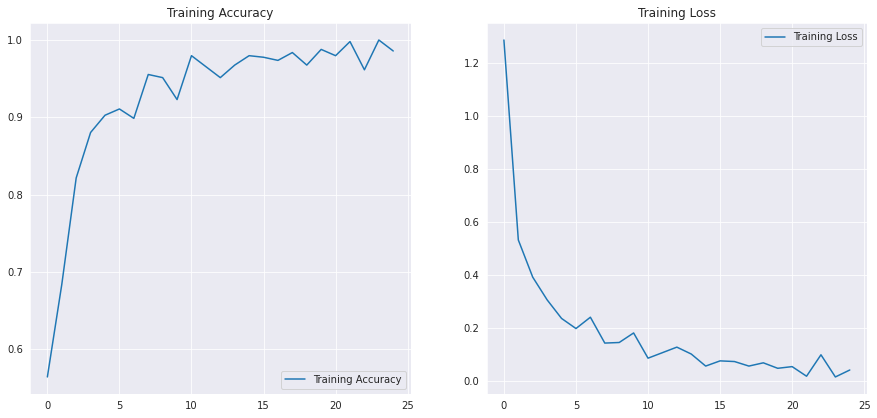

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

We can see from the curves above that the precision reaches its maximum, so we can say that the model seems to be well trained. 

The validation step would allow us to verify that the model does not overfit. This step is part of the improvement axes.

### 5.6.2 Confusion Matrix 


In [ ]:
path = "ChihuahuaVSMuffin"
train_data_path = "ChihuahuaVSMuffin/train"
test_data_path = "ChihuahuaVSMuffin/test"
valid_data_path = "ChihuahuaVSMuffin/validation"

batch_size = 10

In [ ]:
imgs, labels = next(train_generator)

In [ ]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

In [ ]:
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(150,150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(150,150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(150,150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 527 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


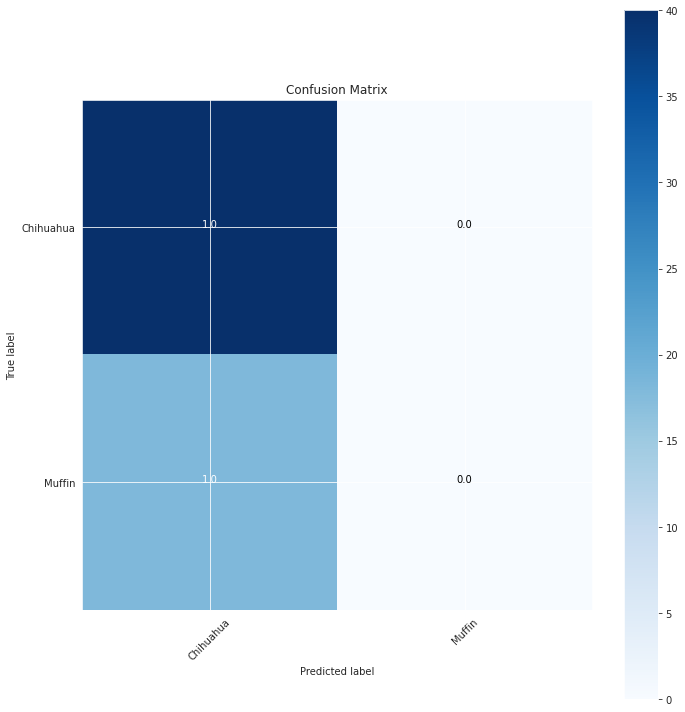

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   Chihuahua       0.69      1.00      0.82        40
      Muffin       0.00      0.00      0.00        18

    accuracy                           0.69        58
   macro avg       0.34      0.50      0.41        58
weighted avg       0.48      0.69      0.56        58



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.7 Test the model on the test set

After the training of the model, we want to test if the algorithm work and if it can differenciate a muffin and a chihuahua. 


### 5.7.1 Muffin Test

First, we check the if our algorithm is trained enough to recognize a muffin.Before the test, we have created a folder with new images of Muffin and Chihuahua that the algorithm have never seen. 

Here, we're taking the muffin folder of 18 images. 

We make sure that the size of the image are fine by applying the function " get_data". Then, we ask our machine to read the image and to predict their label. 

Here we can see that our machine have guessed that these images were Muffin's enough though the machine has never seen them. 

In [ ]:
labels = ['Muffin']
Muffin_test = get_data("ChihuahuaVSMuffin/test")
print('Muffin_test length is ', len(Muffin_test))
#print(Muffin_test)

In [ ]:
num_classes = 2 
#number =  # number is the number-th of the image that we want to test in our data set in the test set 

x = []
y = []

for feature, label in Muffin_test:
    x.append(feature)
    y.append(label)

#Normalize
x = np.array(x) / 255

x.reshape(-1, img_size, img_size, 1)
y = np.array(y)


x = x.astype('float32')

y = keras.utils.to_categorical(y, num_classes)

In [ ]:
predict = ['Muffin', 'Chihuahua']

model.predict(x)
model.predict_classes(x)
y = np.round(y)
print(len(y))
#print(y)


classes = model.predict(x)
#print('classes', classes)

for i in range(0,1):
    if round(classes[0][i]) == 1:
        print(predict[1])
    if round(classes[0][i]) == 0:
        print(predict[0])


### 5.7.2 Chihuahua Test

We then do the same for the Chihuahua. We take a folder with Chihuhua images than the machine does not know. And we wait for the result. 



In [ ]:
labels = ['Chihuahua']
Chihuahua_test = get_data("ChihuahuaVSMuffin/test")
print('Chihuahua_test length is ', len(Chihuahua_test))
#print(Chihuahua_test)

In [ ]:
num_classes = 2 
#number =  # number is the number-th of the image that we want to test in our data set in the test set 

x = []
y = []

for feature, label in Chihuahua_test:
    x.append(feature)
    y.append(label)

#Normalize
x = np.array(x) / 255

x.reshape(-1, img_size, img_size, 1)
y = np.array(y)

x = x.astype('float32')

y = keras.utils.to_categorical(y, num_classes)

In [ ]:
predict = ['Muffin', 'Chihuahua']

model.predict(x)
model.predict_classes(x)
y = np.round(y)
print(len(y))

classes = model.predict(x)
#print('classes', classes)

for i in range(0,1):
    if round(classes[0][i]) == 1:
        print(predict[1])
    if round(classes[0][i]) == 0:
        print(predict[0])

The machine has redict the result that we wanted, these images are Chihuahua's pictures. We can say that our machine learning algorithm is trained enough and it can predict correctly if the image is a Chihuahua or a Muffin. 

## 6. Fine_Tune the System 

### 6.1 Rescale RGB colors

Once we have all the images, we went to rescale the RGB colours in order to have the same scale for each one of them.

Rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor
For that we start by loading the image as an array and dividing it by 255 (the colours of RGB) to obtain a scale that goes from 0 to 1. 

From there on, we find the mean from all the dataset of red, blue and green and we divide the array of all the images by this mean. 

Finally, to end the rescale process, we divide the new values of the array of each colour red, blue and green by the maximum value of each colour.

In [ ]:
import numpy as np
img = image.load_img('ChihuahuaVSMuffin/Chihuahua/chihuahua-5.jpg', target_size=(150, 150))# mettre à jour pour appliquer le recale rgb sur toutes les images chihuahua
img2 = image.load_img('ChihuahuaVSMuffin/Muffin/muffin-5.jpeg', target_size=(150, 150)) # mettre à jour pour appliquer le recale rgb sur toutes les images muffin
z = image.img_to_array(img)/255.
y = image.img_to_array(img2)/255.

listofarrayimagesChihuahuaANDMuffin = np.array([z, y])

print(listofarrayimagesChihuahuaANDMuffin[1,:,:,0])

moyRouge = 0
moyVert  = 0
moyBleu  = 0
for x in listofarrayimagesChihuahuaANDMuffin:
    moyRouge += np.sum(x[:,:,0])
    moyVert  += np.sum(x[:,:,1])
    moyBleu  += np.sum(x[:,:,2])
moyRouge /= (len(listofarrayimagesChihuahuaANDMuffin)*150*150)
moyVert  /= (len(listofarrayimagesChihuahuaANDMuffin)*150*150)
moyBleu  /= (len(listofarrayimagesChihuahuaANDMuffin)*150*150)

moyennes = [moyRouge, moyVert, moyBleu]

listofarrayimagesChihuahuaANDMuffin[:,:,:] /= moyennes

listofarrayimagesChihuahuaANDMuffin[:,:,:,0] /= np.max(listofarrayimagesChihuahuaANDMuffin[:,:,:,0])
listofarrayimagesChihuahuaANDMuffin[:,:,:,1] /= np.max(listofarrayimagesChihuahuaANDMuffin[:,:,:,1])
listofarrayimagesChihuahuaANDMuffin[:,:,:,2] /= np.max(listofarrayimagesChihuahuaANDMuffin[:,:,:,2])

# listofarrayimagesChihuahuaANDMuffin[:,:,:] /= np.amax(listofarrayimagesChihuahuaANDMuffin[:,:,:], axis=)

# x[:,:,0] /= moyRouge
# x[:,:,0] /= np.max(listofarrayimagesChihuahuaANDMuffin[:,:,:,0])
# x[:,:,1] /= moyVert
# x[:,:,1] /= np.max(listofarrayimagesChihuahuaANDMuffin[:,:,:,1])
# x[:,:,2] /= moyBleu
# x[:,:,2] /= np.max(listofarrayimagesChihuahuaANDMuffin[:,:,:,2])

print(listofarrayimagesChihuahuaANDMuffin[1,:,:,0])

## 7. Our project

### 7.1 What we have done

For this project, we chose to develop an image classification algorithm. A trend on social networks was noticed a few years ago to compare animals and similar dishes. Our choice was to differentiate between Chihuahua and blueberry muffin. 

Image classification is a widespread phenomenon nowadays. There are mobile applications that allow you to find out the type of tree by taking a leaf or a flower in a photo. 

We therefore first had to create the dataset in order to limit the bias. To do this, we needed a complete dataset, i.e. chihuahuas with different coat colours for example or muffins with different baking times. 

Then we preprocessed the images in order to normalize them but also to increase the size of the dataset. Then we created a model with a certain number of layers and defined hyperparameters. We then compared this neural network model to two other types of neural networks in order to evaluate their accuracy. 


### 7.2 What we achieve

We created in total three neural network. The first one here above on this jupyter notebook was our reference and we made it ourself in order to learn each kind of layers and their utilities. The two other ones are inspired by papers found on the internet in order to see which other neural network have been made already and who worked before on it.

We achieve to do a functional neural network that can be trained and classify itself if the image processed is a Chihuhua or a blueberry muffin. 

We also did a confusion matrix that can help us to see if the model is efficient enough and how good the accuracy is. 

### 7.3 How we achieve the business objective

To achieve this goal, we used our Predictive Modeling courses as we discussed activation functions and in particular the one used for image classification. 

We also compared our model with two other neural networks in order to deduce the parameters to be changed in order to increase its accuracy. 

### 7.4 What interesting points we noticed 

The two other neural network that we did in order to compare with the first one, helped us to understand better to use of each layers of a network. We could understand different ways to do a model of classification and each result was interesting to analyze. 

We noticed also that a confusion matrix could really help us to analyze the real accuracy of the model for each classes. Even if the model trained can have a good accuracy, the matrix can be different. It can even give an opposite result. 
